In [1]:
from matplotlib import pyplot as plt
# import b2plot as bp
# plt.style.use('belle2_modern')
# plt.style.use('belle2')


# basic setup of the notebook

import numpy as np

# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit,cost

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

# display iminuit version
import iminuit
print("iminuit version:", iminuit.__version__)

iminuit version: 2.15.2


In [2]:
# plt.style.available
# plt.style.use('belle2_modern')
px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

In [3]:
from hist.get_data import get_data

Welcome to JupyROOT 6.26/04


In [4]:
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL
from iminuit.util import describe
from matplotlib import pyplot as plt
import numpy as np
from numba_stats import norm, crystalball
from numba_stats import truncnorm, truncexpon, norm, expon
# from scipy.stats import truncnorm

In [5]:
def crystalball_pdf(x, beta, m, loc, scale):
    
    return crystalball.pdf(x, beta, m, loc, scale)

In [6]:
def signal_crystalball(x, s, beta, m, loc, scale):
    func = s * crystalball.pdf(x, beta, m, loc, scale)
    return s, func

In [7]:
def extended_bin_signal_crystalball(x, s, beta, m, loc, scale):
    func = s * crystalball.pdf(x, beta, m, loc, scale)
    return func

In [17]:
def gauss_signal_crystalball(x, s1, s2, beta, m, loc, scale, mu, sigma):
    func = s1 * crystalball.pdf(x, beta, m, loc, scale) + s2*truncnorm.pdf(x,*xr, mu, sigma)
    return s1+s2, func

In [5]:
file='/media/jykim/ssd_T5/storage/01_recon/antiKstar/v2_all_signalMC_recon_mdst_antiKstar.root'

In [6]:
file='/media/jykim/ssd_T5/storage/01_recon/antiKstar/v2_all_signalMC_recon_mdst_antiKstar.root'
file='/media/jykim/ssd_T5/storage/01_recon/phi/v2_all_signalMC_recon_mdst_phi.root'

variables=['D0_M','Pi0_Prob']
tree = 'antiKstar'
tree = 'phi'

In [7]:
df_antiKstar= get_data(file=file, tree=tree,variables=variables)

In [8]:
df_antiKstar_Pi0veto= get_data(file=file, tree=tree,variables=variables,base_filter='Pi0_Prob<0.9')
df_antiKstar_Pi0veto.describe()

,D0_M,Pi0_Prob
count,76541.000000,7.654100e+04
mean,1.858442,3.197872e-01
std,0.021454,2.877266e-01
min,1.665261,2.669249e-07
25%,1.849710,5.106067e-02
50%,1.861044,2.527811e-01
75%,1.870518,5.501136e-01
max,2.064014,8.999168e-01


In [9]:
df_antiKstar.describe()

,D0_M,Pi0_Prob
count,86371.000000,8.637000e+04
mean,1.858404,3.917140e-01
std,0.023305,3.372476e-01
min,1.665261,2.669249e-07
25%,1.849383,6.774578e-02
50%,1.860975,3.132497e-01
75%,1.870650,7.073959e-01
max,2.064474,9.945960e-01


In [10]:
n, xe = np.histogram(df_antiKstar['D0_M'], bins=50, range=(1.665,2.065))

In [20]:
# COST = cost.LeastSquares( )

In [21]:
# COST = cost.ExtendedUnbinnedNLL(df_antiKstar_Pi0veto['D0_M'], crystalball_pdf)

# Unbinned fit

## Not pi0 veto

In [444]:
xr = (1.665,2.065)

In [445]:
def crystalball_pdf(x, beta, m, loc, scale):
    
    return crystalball.pdf(x, beta, m, loc, scale)

### single CB

In [447]:

COST = cost.UnbinnedNLL(df_antiKstar['D0_M'], crystalball_pdf)
m = Minuit(COST, beta=0.937, m=45.71, loc=1.86, scale=0.013)

# m.limits["beta"] = (0, 2.5)
# m.limits["loc"]=(1.80, 1.90)
# m.limits["scale"]= (0, 0.03)
# m.limits["m"]= (0,50)



m.limits["beta"] = (0, 2)
m.limits["loc"]=(1.80, 1.90)
m.limits["scale"]= (0, 0.05)
m.limits["m"]= (0,None)
m.migrad()



E VariableMetricBuilder Initial matrix not pos.def.


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -3.062e+06                 │              Nfcn = 570              │
│ EDM = nan (Goal: 0.0002)         │            time = 0.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ beta  │ 9.9937e-2 │    nan    │            │            │    0    │    2    │       │
│ 1 │ m     │ 1.1964e-1 │    nan    │            │            │    0    │         │       │
│ 2 │ loc   │   1.86    │    nan    │            │            │   1.8   │   1.9   │       │
│ 3 │ scale │  1.3e-2   │    nan    │            │            │    0    │  0.05   │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────┐
│       │  beta     m   loc scale │
├───────┼─────────────────────────┤
│  beta │   nan   nan   nan   nan │
│     m │   nan   nan   nan   nan │
│   loc │   nan   nan   nan   nan │
│ scale │   nan   nan   nan   nan │
└───────┴─────────────────────────┘

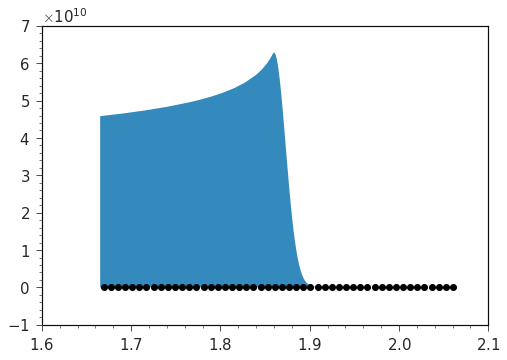

In [448]:
COST.visualize(m.values)

In [449]:
m.interactive()

In [441]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -4.228e+05                 │              Nfcn = 380              │
│ EDM = 2.68e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ beta  │   1.643   │   0.017   │   -0.017   │   0.017    │    0    │    2    │       │
│ 1 │ m     │   3.81    │   0.11    │   -0.11    │    0.11    │    0    │         │       │
│ 2 │ loc   │  1.86091  │  0.00007  │  -0.00007  │  0.00007   │   1.8   │   1.9   │       │
│ 3 │ scale │ 18.30e-3  │  0.06e-3  │  -0.06e-3  │  0.06e-3   │    0    │  0.05   │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │         beta          │           m           │          loc          │         scale         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.017   │   0.017   │   -0.11   │   0.11    │ -0.07e-3  │  0.07e-3  │ -0.06e-3  │  0.06e-3  │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬─────────────────────────────────────────┐
│       │      beta         m       loc     scale │
├───────┼─────────────────────────────────────────┤
│  beta │  0.000288  -0.00148 -3.36e-07  3.02e-07 │
│     m │  -0.00148    0.0118  1.09e-06 -6.01e-07 │
│   loc │ -3.36e-07  1.09e-06  4.92e-09 -9.51e-10 │
│ scale │  3.02e-07 -6.01e-07 -9.51e-10  3.03e-09 │
└───────┴─────────────────────────────────────────┘

In [442]:
n, xe = np.histogram(df_antiKstar['D0_M'], bins=50, range=(1.665,2.065))
cx = 0.5 * (xe[1:] + xe[:-1])

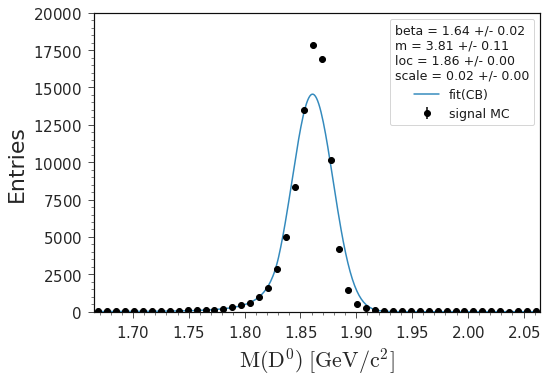

In [443]:

px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))
import b2plot as bp
plt.style.use('belle2_modern')
# xrange = (1.665,2.065, 400)
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)
# dx = 0.4/50
dx = np.diff(xe)

plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")
plt.plot(xm, crystalball_pdf(xm, *m.values) * len(df_antiKstar['D0_M']) * dx[0],label="fit(CB)")
# plt.plot(xm, m.values['z']* crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] )* len(df_antiKstar['D0_M']) * dx[0],label="CB")
# plt.plot(xm, (1 - m.values['z']) * norm.pdf(xm, m.values['mu'], m.values['sigma'])* len(df_antiKstar['D0_M']) * dx[0],label="Gauss")


# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
plt.ylabel("Entries");

### 1 CB + 1 gauss

In [ ]:
def gauss_signal_crystalball(x, z, beta, m, loc, scale, mu, sigma):
    func = z * crystalball.pdf(x, beta, m, loc, scale) + (1-z) * norm.pdf(x, mu, sigma)
    return func

In [504]:
COST = cost.UnbinnedNLL(df_antiKstar['D0_M'], gauss_signal_crystalball)
m = Minuit(COST,  z=0.6, beta=1, m=50, loc=1.86, scale=1, mu=1.86, sigma=0.05)




In [505]:

m.limits["z"] = (0, 1)
m.limits["beta"] = (0, None)
m.limits["loc","mu"]=(1.80, 1.90)
m.limits["scale","sigma"]= (0, None)
m.limits["m"]= (0,100)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -4.409e+05                 │             Nfcn = 1009              │
│ EDM = 2.85e-06 (Goal: 0.0002)    │            time = 1.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z     │  0.9615   │  0.0014   │            │            │    0    │    1    │       │
│ 1 │ beta  │   0.921   │   0.010   │            │            │    0    │         │       │
│ 2 │ m     │    100    │    23     │            │            │    0    │   100   │       │
│ 3 │ loc   │  1.86274  │  0.00008  │            │            │   1.8   │   1.9   │       │
│ 4 │ scale │ 13.11e-3  │  0.07e-3  │            │            │    0    │         │       │
│ 5 │ mu    │  1.8447   │  0.0015   │            │            │   1.8   │   1.9   │       │
│ 6 │ sigma │  0.0780   │  0.0014   │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────┐
│       │         z      beta         m       loc     scale        mu     sigma │
├───────┼───────────────────────────────────────────────────────────────────────┤
│     z │  2.04e-06 -3.39e-06  9.91e-07  9.75e-09  1.63e-08  2.13e-07   1.2e-06 │
│  beta │ -3.39e-06  9.48e-05  1.44e-05 -5.19e-07  4.38e-07 -3.34e-06 -2.15e-06 │
│     m │  9.91e-07  1.44e-05  0.000196 -3.37e-08  2.85e-08  6.47e-07     5e-07 │
│   loc │  9.75e-09 -5.19e-07 -3.37e-08  6.04e-09 -3.08e-09  1.12e-08   5.2e-09 │
│ scale │  1.63e-08  4.38e-07  2.85e-08 -3.08e-09  4.36e-09 -1.24e-08  1.24e-08 │
│    mu │  2.13e-07 -3.34e-06  6.47e-07  1.12e-08 -1.24e-08  2.29e-06  1.11e-07 │
│ sigma │   1.2e-06 -2.15e-06     5e-07   5.2e-09  1.24e-08  1.11e-07  1.84e-06 │
└───────┴───────────────────────────────────────────────────────────────────────┘

In [506]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -4.409e+05                 │             Nfcn = 1707              │
│ EDM = 2.85e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z     │  0.9615   │  0.0014   │  -0.0014   │   0.0014   │    0    │    1    │       │
│ 1 │ beta  │   0.921   │   0.010   │   -0.010   │   0.010    │    0    │         │       │
│ 2 │ m     │99.9999980 │22.5021741 │-19.4697523 │ 0.0000020  │    0    │   100   │       │
│ 3 │ loc   │  1.86274  │  0.00008  │  -0.00008  │  0.00008   │   1.8   │   1.9   │       │
│ 4 │ scale │ 13.11e-3  │  0.07e-3  │  -0.07e-3  │  0.07e-3   │    0    │         │       │
│ 5 │ mu    │  1.8447   │  0.0015   │  -0.0015   │   0.0015   │   1.8   │   1.9   │       │
│ 6 │ sigma │  0.0780   │  0.0014   │  -0.0013   │   0.0014   │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           z           │         beta          │           m           │          loc          │         scale         │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.0014  │  0.0014   │   -0.01   │   0.01    │-19469752.3e-6│  2.0e-6   │ -0.08e-3  │  0.08e-3  │ -0.07e-3  │  0.07e-3  │  -0.0015  │  0.0015   │  -0.0013  │  0.0014   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   True    │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬───────────────────────────────────────────────────────────────────────┐
│       │         z      beta         m       loc     scale        mu     sigma │
├───────┼───────────────────────────────────────────────────────────────────────┤
│     z │  2.04e-06 -3.39e-06  9.91e-07  9.75e-09  1.63e-08  2.13e-07   1.2e-06 │
│  beta │ -3.39e-06  9.48e-05  1.44e-05 -5.19e-07  4.38e-07 -3.34e-06 -2.15e-06 │
│     m │  9.91e-07  1.44e-05  0.0

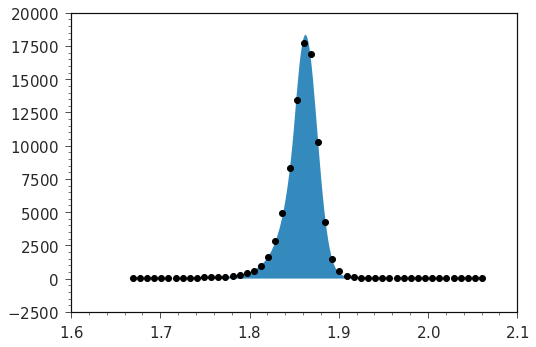

In [507]:
COST.visualize(m.values)

In [510]:
n, xe = np.histogram(df_antiKstar['D0_M'], bins=50, range=(1.665,2.065))
cx = 0.5 * (xe[1:] + xe[:-1])


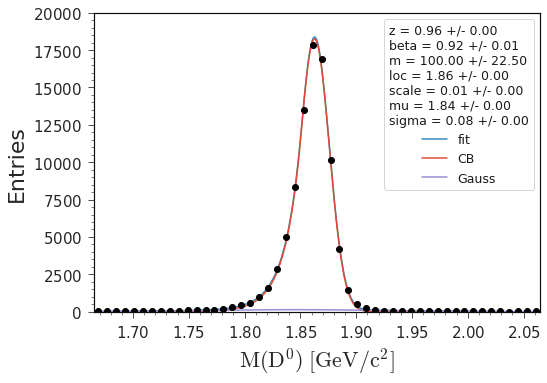

In [511]:

px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))
# import b2plot as bp
# plt.style.use('belle2_modern')
# xrange = (1.665,2.065, 400)
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)
# dx = 0.4/50
dx = np.diff(xe)

plt.errorbar(cx, n, n ** 0.5, fmt="ok")
plt.plot(xm, gauss_signal_crystalball(xm, *m.values) * len(df_antiKstar['D0_M']) * dx[0],label="fit")
plt.plot(xm, m.values['z']* crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] )* len(df_antiKstar['D0_M']) * dx[0],label="CB")
plt.plot(xm, (1 - m.values['z']) * norm.pdf(xm, m.values['mu'], m.values['sigma'])* len(df_antiKstar['D0_M']) * dx[0],label="Gauss")


# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
plt.ylabel("Entries");


# Extended unbinned fit

## Single CB

In [559]:
def extended_single_crystalball(x, s, beta, m, loc, scale):
    func = s * crystalball.pdf(x, beta, m, loc, scale)
    return s, func

In [560]:
COST = cost.ExtendedUnbinnedNLL(df_antiKstar['D0_M'], extended_single_crystalball)
m = Minuit(COST,  s=76000, beta=1, m=3, loc=1.86, scale=0.01)


In [561]:
m.limits["s","beta","m"]=(0,None)
m.limits["scale"]=(0, 0.05)
m.limits["loc"]=(1.80, 1.90)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -2.214e+06                 │              Nfcn = 173              │
│ EDM = 3.56e-05 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s     │  86.37e3  │  0.29e3   │            │            │    0    │         │       │
│ 1 │ beta  │   1.643   │   0.017   │            │            │    0    │         │       │
│ 2 │ m     │   3.82    │   0.11    │            │            │    0    │         │       │
│ 3 │ loc   │  1.86091  │  0.00007  │            │            │   1.8   │   1.9   │       │
│ 4 │ scale │ 18.30e-3  │  0.06e-3  │            │            │    0    │  0.05   │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────┐
│       │         s      beta         m       loc     scale │
├───────┼───────────────────────────────────────────────────┤
│     s │  8.33e+04     0.184     -1.58  0.000289 -0.000221 │
│  beta │     0.184  0.000297  -0.00154 -3.78e-07  3.28e-07 │
│     m │     -1.58  -0.00154    0.0122  1.42e-06 -7.85e-07 │
│   loc │  0.000289 -3.78e-07  1.42e-06  4.94e-09 -9.77e-10 │
│ scale │ -0.000221  3.28e-07 -7.85e-07 -9.77e-10  3.07e-09 │
└───────┴───────────────────────────────────────────────────┘

In [562]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -2.214e+06                 │              Nfcn = 623              │
│ EDM = 3.56e-05 (Goal: 0.0002)    │            time = 0.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s     │  86.37e3  │  0.29e3   │  -0.29e3   │   0.30e3   │    0    │         │       │
│ 1 │ beta  │   1.643   │   0.017   │   -0.017   │   0.018    │    0    │         │       │
│ 2 │ m     │   3.82    │   0.11    │   -0.11    │    0.11    │    0    │         │       │
│ 3 │ loc   │  1.86091  │  0.00007  │  -0.00007  │  0.00007   │   1.8   │   1.9   │       │
│ 4 │ scale │ 18.30e-3  │  0.06e-3  │  -0.06e-3  │  0.06e-3   │    0    │  0.05   │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           s           │         beta          │           m           │          loc          │         scale         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.29e3  │  0.30e3   │  -0.017   │   0.018   │   -0.11   │   0.11    │ -0.07e-3  │  0.07e-3  │ -0.06e-3  │  0.06e-3  │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬───────────────────────────────────────────────────┐
│       │         s      beta         m       loc     scale │
├───────┼───────────────────────────────────────────────────┤
│     s │  8.33e+04     0.184     -1.58  0.000289 -0.000221 │
│  beta │     0.184  0.000297  -0.00154 -3.78e-07  3.28e-07 │
│     m │     -1.58  -0.00154    0.0122  1.42e-06 -7.85e-07 │
│   loc │  0.000289 -3.78e-07  1.42e-06  4.94e-09 -9.77e-10 │
│ scale │ -0.000221  3.28e-07 -7.85e-07 -9.77e-10  3.07e-09 │
└───────┴───────────────────────────────────────────────────┘

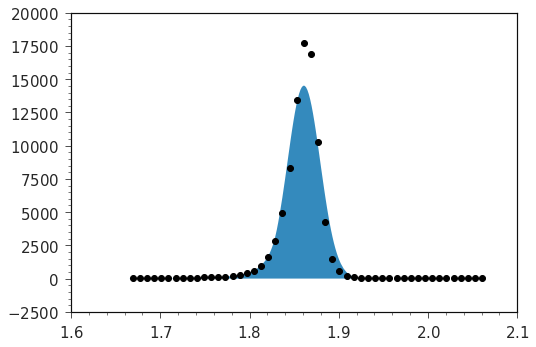

In [563]:
COST.visualize(m.values)

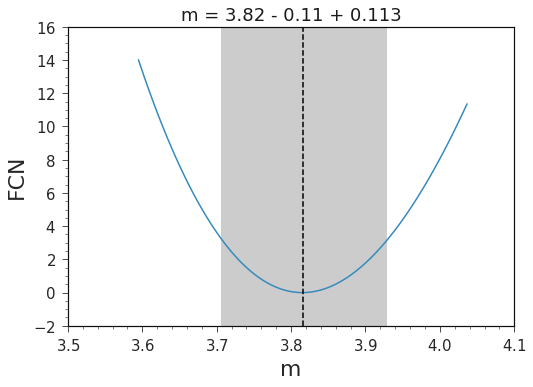

In [565]:
m.draw_profile("m");

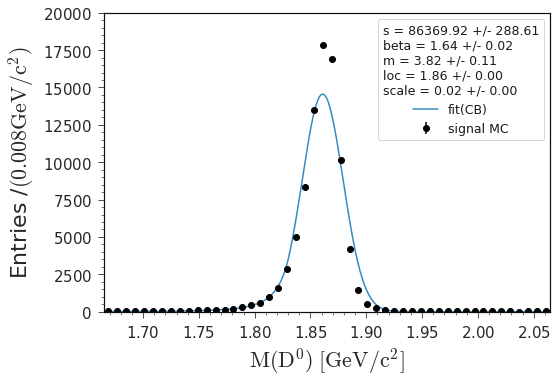

In [574]:
n, xe = np.histogram(df_antiKstar['D0_M'], bins=50, range=(1.665,2.065))
cx = 0.5 * (xe[1:] + xe[:-1])

px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))
import b2plot as bp
plt.style.use('belle2_modern')
# xrange = (1.665,2.065, 400)
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)
# dx = 0.4/50
dx = np.diff(xe)

plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, extended_single_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

plt.plot(xm, extended_single_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB)")
# plt.plot(xm, m.values['z']* crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] )* len(df_antiKstar['D0_M']) * dx[0],label="CB")
# plt.plot(xm, (1 - m.values['z']) * norm.pdf(xm, m.values['mu'], m.values['sigma'])* len(df_antiKstar['D0_M']) * dx[0],label="Gauss")


# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")

width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

# plt.ylabel("Entries");

In [566]:
xe

array([1.665, 1.673, 1.681, 1.689, 1.697, 1.705, 1.713, 1.721, 1.729,
       1.737, 1.745, 1.753, 1.761, 1.769, 1.777, 1.785, 1.793, 1.801,
       1.809, 1.817, 1.825, 1.833, 1.841, 1.849, 1.857, 1.865, 1.873,
       1.881, 1.889, 1.897, 1.905, 1.913, 1.921, 1.929, 1.937, 1.945,
       1.953, 1.961, 1.969, 1.977, 1.985, 1.993, 2.001, 2.009, 2.017,
       2.025, 2.033, 2.041, 2.049, 2.057, 2.065])

In [524]:
df_antiKstar.describe()

,D0_M,Pi0_Prob
count,86371.000000,8.637000e+04
mean,1.858404,3.917140e-01
std,0.023305,3.372476e-01
min,1.665261,2.669249e-07
25%,1.849383,6.774578e-02
50%,1.860975,3.132497e-01
75%,1.870650,7.073959e-01
max,2.064474,9.945960e-01


## 1 CB + 1 gauss

In [576]:
def extended_gauss_crystalball(x, s1, s2, beta, m, loc, scale, mu, sigma):
    func = s1 * crystalball.pdf(x, beta, m, loc, scale) + s2 * norm.pdf(x, mu, sigma)
#     return func
    return s1 + s2, func

In [577]:
# def gauss_signal_crystalball(x, z, beta, m, loc, scale, mu, sigma):
#     func = z * crystalball.pdf(x, beta, m, loc, scale) + (1-z) * norm.pdf(x, mu, sigma)
#     return func

In [578]:
COST = cost.ExtendedUnbinnedNLL(df_antiKstar['D0_M'], extended_gauss_crystalball)
m = Minuit(COST,  s1=76000,s2=1000, beta=1, m=3, loc=1.86, scale=0.01, mu=1.86, sigma=0.01)


In [579]:
m.limits["s1","s2","beta","m"]=(0,None)
m.limits["scale","sigma"]=(0, 0.05)
m.limits["loc","mu"]=(1.80, 1.90)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -2.231e+06                 │              Nfcn = 450              │
│ EDM = 0.000117 (Goal: 0.0002)    │            time = 0.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1    │  84.81e3  │  0.29e3   │            │            │    0    │         │       │
│ 1 │ s2    │  1.56e3   │  0.06e3   │            │            │    0    │         │       │
│ 2 │ beta  │   1.058   │   0.014   │            │            │    0    │         │       │
│ 3 │ m     │   6.03    │   0.20    │            │            │    0    │         │       │
│ 4 │ loc   │  1.86248  │  0.00008  │            │            │   1.8   │   1.9   │       │
│ 5 │ scale │ 13.29e-3  │  0.07e-3  │            │            │    0    │  0.05   │       │
│ 6 │ mu    │  1.90000  │  0.00023  │            │            │   1.8   │   1.9   │       │
│ 7 │ sigma │ 50.00e-3  │  0.05e-3  │            │            │    0    │  0.05   │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────┐
│       │        s1        s2      beta         m       loc     scale        mu     sigma │
├───────┼─────────────────────────────────────────────────────────────────────────────────┤
│    s1 │  8.29e+04 -1.82e+03     0.174     -1.15 -0.000316  0.000911 -6.03e-06 -1.44e-06 │
│    s2 │ -1.82e+03  3.78e+03    -0.106     0.595  0.000234  -0.00101 -1.63e-06  2.92e-07 │
│  beta │     0.174    -0.106  0.000197  -0.00227 -7.15e-07  6.15e-07 -8.91e-11  5.92e-11 │
│     m │     -1.15     0.595  -0.00227    0.0394  6.23e-06 -4.25e-06  1.25e-10 -7.44e-10 │
│   loc │ -0.000316  0.000234 -7.15e-07  6.23e-06  6.06e-09 -3.16e-09  5.76e-13 -1.65e-13 │
│ scale │  0.000911  -0.00101  6.15e-07 -4.25e-06 -3.16e-09   4.4e-09 -3.66e-13   7.6e-14 │
│    mu │ -6.03e-06 -1.63e-06 -8.91e-11  1.25e-10  5.76e-13 -3.66e-13   2.6e-12 -3.04e-15 │
│ sigma │ -1.44e-06  2.92e-07  5.92e-11 -7.44e-10 -1.65e-13   7.6e-14 -3.04e-15  8.45e-14 │
└───────┴─────────────────────────────────────────────────────────────────────────────────┘

In [580]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -2.231e+06                 │             Nfcn = 1340              │
│ EDM = 0.000117 (Goal: 0.0002)    │            time = 0.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1    │  84.81e3  │  0.29e3   │  -0.29e3   │   0.30e3   │    0    │         │       │
│ 1 │ s2    │  1.56e3   │  0.06e3   │  -0.06e3   │   0.06e3   │    0    │         │       │
│ 2 │ beta  │   1.058   │   0.014   │   -0.014   │   0.014    │    0    │         │       │
│ 3 │ m     │   6.03    │   0.20    │   -0.20    │    0.21    │    0    │         │       │
│ 4 │ loc   │  1.86248  │  0.00008  │  -0.00008  │  0.00008   │   1.8   │   1.9   │       │
│ 5 │ scale │ 13.29e-3  │  0.07e-3  │  -0.07e-3  │  0.07e-3   │    0    │  0.05   │       │
│ 6 │ mu    │1.8999999972│0.0002330385│-0.0002375984│0.0000000028│   1.8   │   1.9   │       │
│ 7 │ sigma │49.9999996e-3│0.0500477e-3│-0.0501297e-3│0.0000004e-3│    0    │  0.05   │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          s1           │          s2           │         beta          │           m           │          loc          │         scale         │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.29e3  │  0.30e3   │    -60    │    60     │  -0.014   │   0.014   │   -0.20   │   0.21    │ -0.08e-3  │  0.08e-3  │ -0.07e-3  │  0.07e-3  │-237598.4e-9│  2.8e-9   │-50129.7e-9│  0.4e-9   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   True    │   False   │   True    │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────┐
│       │        s1        s2      beta

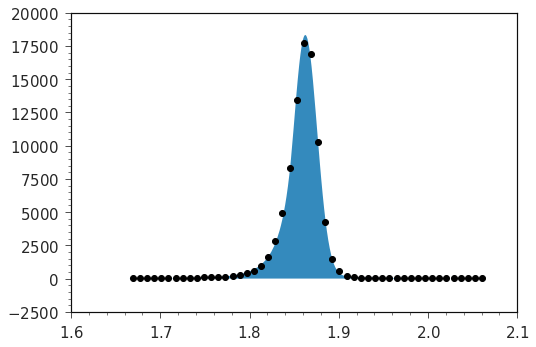

In [581]:
COST.visualize(m.values)

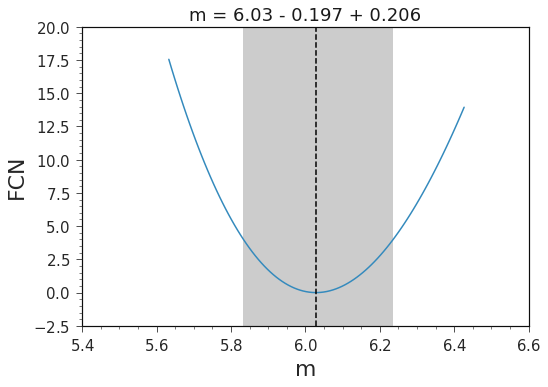

In [582]:
m.draw_profile("m");

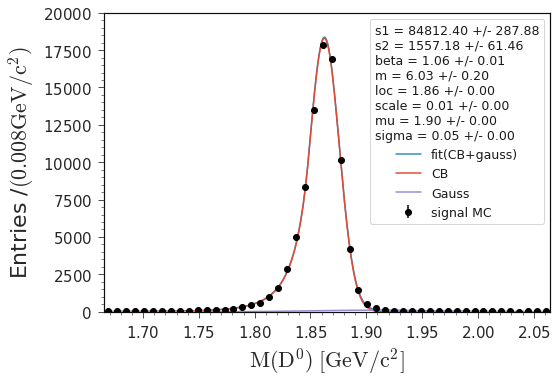

In [585]:
n, xe = np.histogram(df_antiKstar['D0_M'], bins=50, range=(1.665,2.065))
cx = 0.5 * (xe[1:] + xe[:-1])

px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))
import b2plot as bp
plt.style.use('belle2_modern')
# xrange = (1.665,2.065, 400)
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)
# dx = 0.4/50
dx = np.diff(xe)

plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

plt.plot(xm, extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")


# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

# plt.ylabel("Entries");

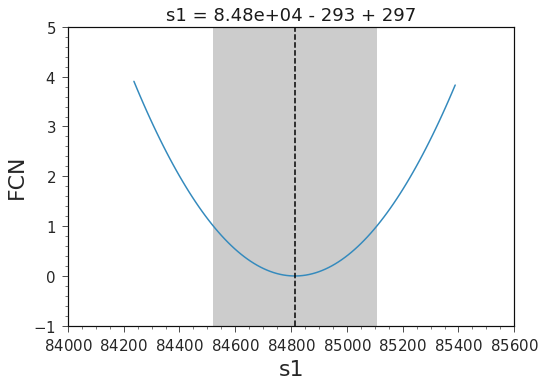

In [584]:
m.draw_profile("s1");

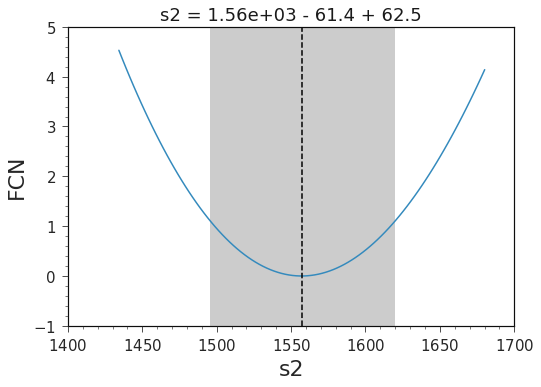

In [549]:
m.draw_profile("s2");

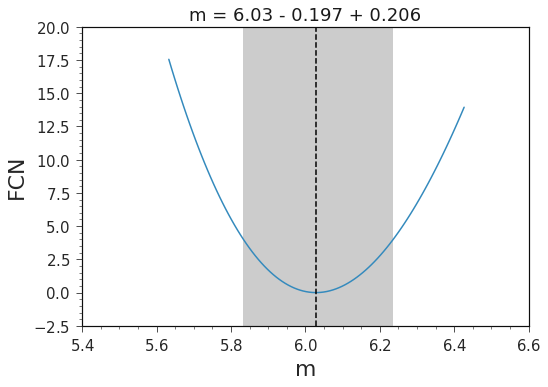

In [550]:
m.draw_profile("m");

In [328]:
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,beta,1.643,0.017,-0.017,0.018,0,,
1,m,3.82,0.11,-0.11,0.11,0,30,
2,loc,1.86091,0.00007,-0.00007,0.00007,1.8,1.9,
3,scale,18.30e-3,0.06e-3,-0.06e-3,0.06e-3,0,0.1,


In [329]:
m_params_list = [p.value for p in m.params]

In [330]:
m_params_list

[1.6428166826485795,
 3.815322070936507,
 1.8609092185084781,
 0.018298620491906562]

In [331]:
m.values['z']

KeyError: 'z'

TypeError: gauss_signal_crystalball() missing 3 required positional arguments: 'scale', 'mu', and 'sigma'

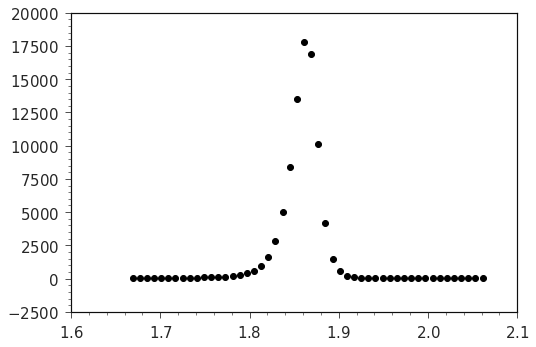

## After pi0 veto

In [468]:
COST = cost.UnbinnedNLL(df_antiKstar[df_antiKstar['Pi0_Prob']<0.9].D0_M, gauss_signal_crystalball)

In [469]:
m = Minuit(COST,  z=0.96, beta=0.5, m=30, loc=1.86, scale=0.05, mu=1.86, sigma=0.05)


In [470]:
m.limits["z"] = (0, 1)
m.limits["beta"] = (0, 10)
m.limits["loc","mu"]=(1.80, 1.90)
m.limits["scale","sigma"]= (0, 0.1)
m.limits["m"]= (0,None)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -3.974e+05                 │             Nfcn = 1108              │
│ EDM = 1.06 (Goal: 0.0002)        │            time = 1.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z     │  0.9653   │  0.0017   │            │            │    0    │    1    │       │
│ 1 │ beta  │   0.921   │   0.011   │            │            │    0    │   10    │       │
│ 2 │ m     │    130    │    50     │            │            │    0    │         │       │
│ 3 │ loc   │  1.86279  │  0.00008  │            │            │   1.8   │   1.9   │       │
│ 4 │ scale │ 12.84e-3  │  0.07e-3  │            │            │    0    │   0.1   │       │
│ 5 │ mu    │  1.8390   │  0.0015   │            │            │   1.8   │   1.9   │       │
│ 6 │ sigma │  0.0680   │  0.0014   │            │            │    0    │   0.1   │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────┐
│       │         z      beta         m       loc     scale        mu     sigma │
├───────┼───────────────────────────────────────────────────────────────────────┤
│     z │  2.75e-06 -3.73e-06   -0.0147  9.36e-09  2.25e-08 -4.35e-08  1.55e-06 │
│  beta │ -3.73e-06  0.000123      -0.2 -6.12e-07  5.09e-07 -2.93e-06 -2.55e-06 │
│     m │   -0.0147      -0.2  2.82e+03  0.000471 -0.000396  -0.00707  -0.00675 │
│   loc │  9.36e-09 -6.12e-07  0.000471  6.63e-09 -3.42e-09  1.05e-08  5.21e-09 │
│ scale │  2.25e-08  5.09e-07 -0.000396 -3.42e-09  4.79e-09 -1.72e-08  1.36e-08 │
│    mu │ -4.35e-08 -2.93e-06  -0.00707  1.05e-08 -1.72e-08  2.33e-06 -6.24e-08 │
│ sigma │  1.55e-06 -2.55e-06  -0.00675  5.21e-09  1.36e-08 -6.24e-08  1.96e-06 │
└───────┴───────────────────────────────────────────────────────────────────────┘

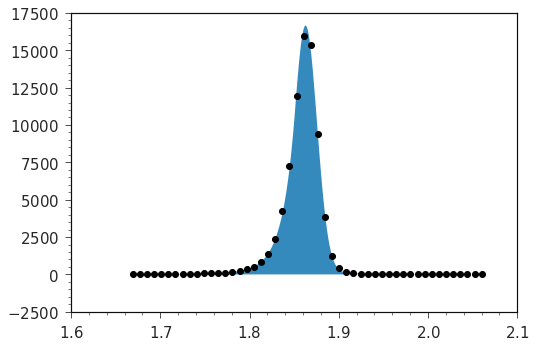

In [471]:
COST.visualize(m.values)

In [472]:
m.minos()

RuntimeError: Function minimum is not valid: <FMin algorithm='Migrad' edm=1.0643385748284586 edm_goal=0.0002 errordef=1.0 fval=-397441.54484903417 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=False hesse_failed=False is_above_max_edm=True is_valid=False nfcn=1108 ngrad=0 reduced_chi2=nan time=1.5954931550004403>

In [473]:
# n, xe = np.histogram(df_antiKstar_Pi0veto['D0_M'], bins=50, range=(1.665,2.065))
n, xe = np.histogram(df_antiKstar[df_antiKstar['Pi0_Prob']<0.9].D0_M, bins=50, range=(1.665,2.065))

In [474]:
cx = 0.5 * (xe[1:] + xe[:-1])

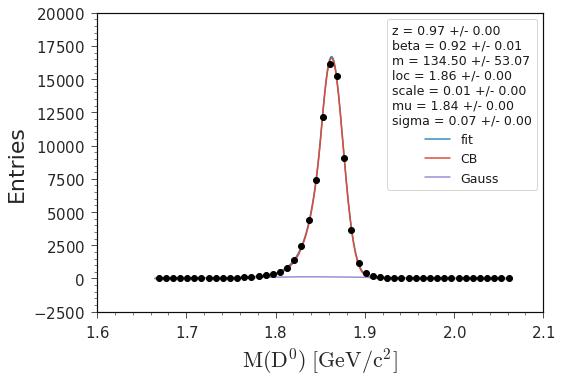

In [475]:

px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))
# import b2plot as bp
# plt.style.use('belle2_modern')
# xrange = (1.665,2.065, 400)
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)
# dx = 0.4/50
dx = np.diff(xe)

plt.errorbar(cx, n, n ** 0.5, fmt="ok")
plt.plot(xm, gauss_signal_crystalball(xm, *m.values) * len(df_antiKstar[df_antiKstar['Pi0_Prob']<0.9].D0_M) * dx[0],label="fit")
plt.plot(xm, m.values['z']* crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] )* len(df_antiKstar[df_antiKstar['Pi0_Prob']<0.9].D0_M) * dx[0],label="CB")
plt.plot(xm, (1 - m.values['z']) * norm.pdf(xm, m.values['mu'], m.values['sigma'])* len(df_antiKstar[df_antiKstar['Pi0_Prob']<0.9].D0_M) * dx[0],label="Gauss")
# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
plt.ylabel("Entries");



In [69]:
# COST = cost.UnbinnedNLL(df_antiKstar_Pi0veto['D0_M'], crystalball_pdf)


# COST = cost.ExtendedUnbinnedNLL(df_antiKstar_Pi0veto['D0_M'], signal_crystalball)
# COST = cost.ExtendedBinnedNLL(n,xe, extended_bin_signal_crystalball)

# COST = cost.ExtendedUnbinnedNLL(df_antiKstar['D0_M'], signal_crystalball)
COST = cost.ExtendedUnbinnedNLL(df_antiKstar['D0_M'], gauss_signal_crystalball)

In [70]:
# m = Minuit(COST, beta=1, m=1.86, loc=1, scale=1)
# m = Minuit(COST, s=70000,beta=1, m=1.86, loc=1, scale=1)

m = Minuit(COST, s1=40000, s2=40000,beta=1, m=1.86, loc=1, scale=1, mu=1.86, sigma=1)



In [72]:
xr = (1,665,2.065)

In [74]:
# m.limits["s","beta", "m", "loc","scale"] = (0, None)
m.limits["s1","s2","beta", "m", "loc","scale","mu","sigma"] = (0, None)
m.migrad()
#m.interactive()

TypeError: pdf() takes 5 positional arguments but 6 were given

In [26]:
# plt.plot(data.x, model(data.x, *m.values[:]), label="model")

m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -2.214e+06                 │             Nfcn = 1085              │
│ EDM = 1.45e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s     │  86.37e3  │  0.28e3   │  -0.29e3   │   0.29e3   │    0    │         │       │
│ 1 │ beta  │   1.643   │   0.017   │   -0.017   │   0.018    │    0    │         │       │
│ 2 │ m     │   3.82    │   0.11    │   -0.11    │    0.11    │    0    │         │       │
│ 3 │ loc   │  1.86091  │  0.00007  │  -0.00007  │  0.00007   │    0    │         │       │
│ 4 │ scale │ 18.30e-3  │  0.05e-3  │  -0.06e-3  │  0.06e-3   │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           s           │         beta          │           m           │          loc          │         scale         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.29e3  │  0.29e3   │  -0.017   │   0.018   │   -0.11   │   0.11    │ -0.07e-3  │  0.07e-3  │ -0.06e-3  │  0.06e-3  │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬───────────────────────────────────────────────────┐
│       │         s      beta         m       loc     scale │
├───────┼───────────────────────────────────────────────────┤
│     s │  8.04e+04   -0.0154     0.354  0.000252  0.000432 │
│  beta │   -0.0154  0.000292  -0.00147 -3.45e-07  2.88e-07 │
│     m │     0.354  -0.00147    0.0114  1.13e-06 -4.46e-07 │
│   loc │  0.000252 -3.45e-07  1.13e-06  4.93e-09 -9.62e-10 │
│ scale │  0.000432  2.88e-07 -4.46e-07 -9.62e-10  2.94e-09 │
└───────┴───────────────────────────────────────────────────┘

In [45]:
m.interactive()

In [28]:
# plt.plot(xm, crystalball_pdf(xm,*m.values))

NameError: name 'xm' is not defined

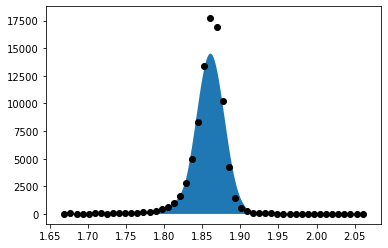

In [44]:
COST.visualize(m.values)

In [29]:
px = 1/plt.rcParams['figure.dpi']

In [32]:
# n, xe = np.histogram(df_antiKstar_Pi0veto['D0_M'], bins=50, range=(1.665,2.065))
n, xe = np.histogram(df_antiKstar['D0_M'], bins=50, range=(1.665,2.065))

In [33]:
cx = 0.5 * (xe[1:] + xe[:-1])

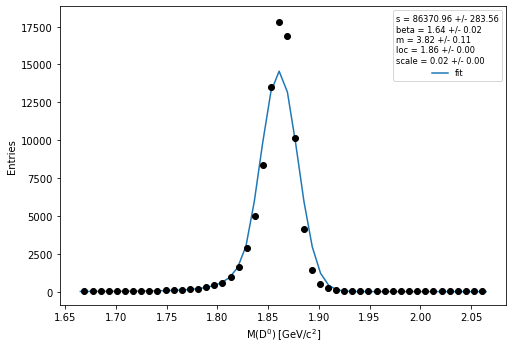

In [42]:


fig = plt.figure(figsize=(576*px, 396*px))
# import b2plot as bp
# plt.style.use('belle2_modern')
# xrange = (1.665,2.065, 400)
xrange = (1.665,2.065)
xm = np.linspace(*xrange)
# dx = 0.4/50
dx = np.diff(xe)

plt.errorbar(cx, n, n ** 0.5, fmt="ok")
plt.plot(xm, signal_crystalball(xm, *m.values)[1] * dx,label="fit")
# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
plt.ylabel("Entries");



In [43]:
dx

array([0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
       0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
       0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
       0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
       0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
       0.008, 0.008, 0.008, 0.008, 0.008])

In [129]:
xe

array([1.665, 1.673, 1.681, 1.689, 1.697, 1.705, 1.713, 1.721, 1.729,
       1.737, 1.745, 1.753, 1.761, 1.769, 1.777, 1.785, 1.793, 1.801,
       1.809, 1.817, 1.825, 1.833, 1.841, 1.849, 1.857, 1.865, 1.873,
       1.881, 1.889, 1.897, 1.905, 1.913, 1.921, 1.929, 1.937, 1.945,
       1.953, 1.961, 1.969, 1.977, 1.985, 1.993, 2.001, 2.009, 2.017,
       2.025, 2.033, 2.041, 2.049, 2.057, 2.065])

In [19]:
xrange = (1.665,2.065, 4899)
xm = np.linspace(*xrange)
#plt.plot(xm, crystalball_pdf(xm, *[p.value for p in m.init_params]) * len(xmix) * dx[0],
#          ls=":", label="init")

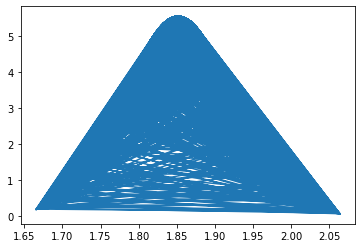

In [51]:
plt.plot(df_antiKstar['D0_M'], crystalball_pdf(df_antiKstar['D0_M'],*m.values))

In [48]:
#plt.errorbar(cx, n, n ** 0.5, fmt="ok")
xm = np.linspace(*xr)
plt.plot(xm, pdf(xm, *[p.value for p in m.init_params]) * len(xmix) * dx[0],
         ls=":", label="init")
plt.plot(xm, pdf(xm, *m.values) * len(xmix) * dx[0], label="fit")
plt.legend();

NameError: name 'xr' is not defined

In [31]:
print(np.linspace(1.665,2.065))

[1.665      1.67316327 1.68132653 1.6894898  1.69765306 1.70581633
 1.71397959 1.72214286 1.73030612 1.73846939 1.74663265 1.75479592
 1.76295918 1.77112245 1.77928571 1.78744898 1.79561224 1.80377551
 1.81193878 1.82010204 1.82826531 1.83642857 1.84459184 1.8527551
 1.86091837 1.86908163 1.8772449  1.88540816 1.89357143 1.90173469
 1.90989796 1.91806122 1.92622449 1.93438776 1.94255102 1.95071429
 1.95887755 1.96704082 1.97520408 1.98336735 1.99153061 1.99969388
 2.00785714 2.01602041 2.02418367 2.03234694 2.0405102  2.04867347
 2.05683673 2.065     ]


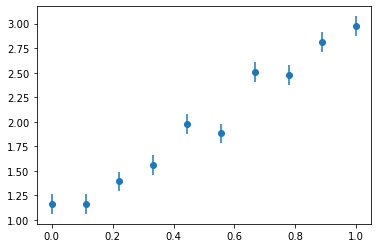

In [9]:
# our line model, unicode parameter names are supported :)
def line(x, α, β):
    return α + x * β




# generate random toy data with random offsets in y
np.random.seed(1)
data_x = np.linspace(0, 1, 10)
data_yerr = 0.1  # could also be an array
data_y = line(data_x, 1, 2) + data_yerr * np.random.randn(len(data_x))

# draw toy data
plt.errorbar(data_x, data_y, data_yerr, fmt="o");

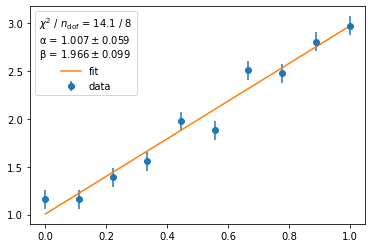

In [4]:
# iminuit contains a LeastSquares class to conveniently generate a least-squares cost function.
# We will revisit how to write this by hand in a later section.
least_squares = LeastSquares(data_x, data_y, data_yerr, line)

m = Minuit(least_squares, α=0, β=0)  # starting values for α and β

m.migrad()  # finds minimum of least_squares function
m.hesse()   # accurately computes uncertainties

# draw data and fitted line
plt.errorbar(data_x, data_y, data_yerr, fmt="o", label="data")
plt.plot(data_x, line(data_x, *m.values), label="fit")

# display legend with some fit info
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}",
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

plt.legend(title="\n".join(fit_info));